In [18]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

from proj1_helpers import *
from implementations import *
from plots import *
from utils import *
from validation import *
from preproccess_utils import *
from validation_baseline import *
import seaborn as sns
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [2]:
import datetime
DATA_TRAIN_PATH = 'data/train.csv' # TODO: download train data and supply path here

labels, input_data, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
# splitting data in train and test splits
seed = 46
ratio = 0.8
x_train, y_train, x_test, y_test = split_data(input_data, labels, ratio=ratio, seed=seed)

In [5]:
# standardize train data : 
x_train, mean_x, std_x = standardize(x_train)
y_train, x_train = build_model_data(x_train, y_train)

# standardize test data :
x_test = (x_test - mean_x)/std_x
y_test, x_test = build_model_data(x_test, y_test)

## Do your thing crazy machine learning thing here :) ...

## Least Squares GD

In [10]:
max_iters = 1000
gamma = 0.08

initial_w = np.random.rand((x_train.shape[1]))
w, loss = least_squares_GD(y_train, x_train, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.6937


### Cross validation for least squares GD

100%|██████████| 10/10 [01:02<00:00,  6.21s/it]


Accuracy is 0.6802


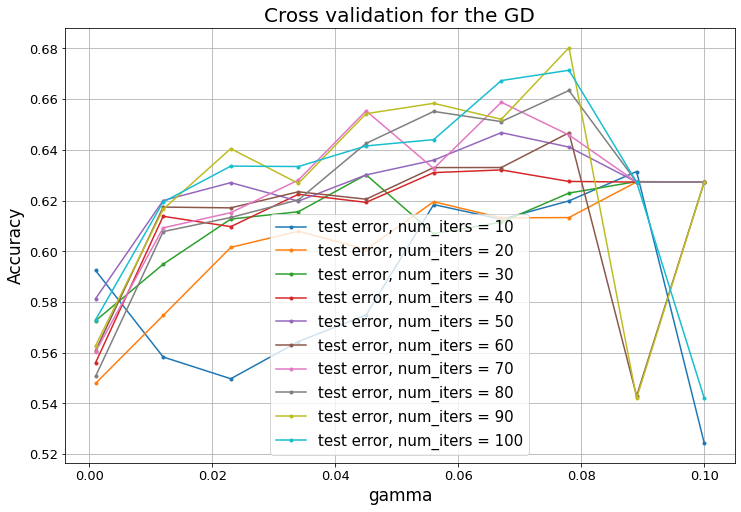

In [9]:
# parameters setting
type_ = 'GD'
bd_left = -3
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 10**bd_right, 10)
max_iters = np.arange(10, 110, 10)
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

**Gradient decent converges if gamma < 0.09.  
In this setting the best gamma = 0.08 and the best max_iter = 500.  
Best accutacy = 0.7470**

## Least Squares SGD

In [12]:
max_iters = 1000
gamma = 0.08

initial_w = np.random.rand((x_train.shape[1]))
w, loss = least_squares_SGD(y_train, x_train, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.60004


### Cross validation for least squares SGD

100%|██████████| 11/11 [01:30<00:00,  8.19s/it]


Accuracy is 0.6257


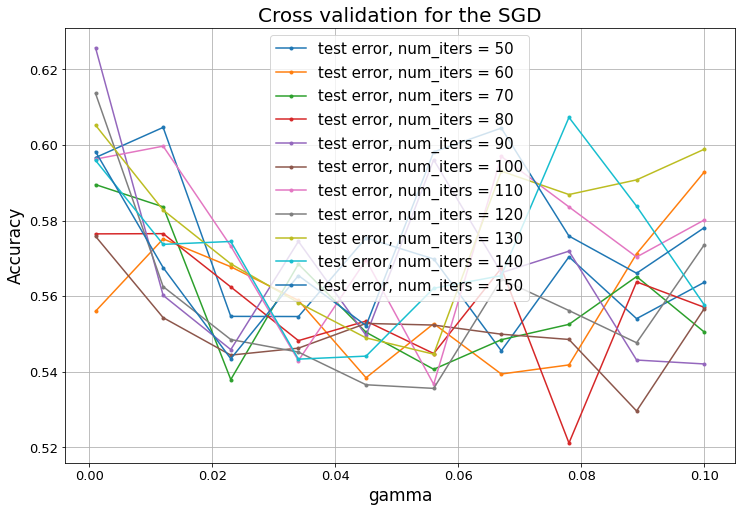

In [11]:
# parameters setting
type_ = 'SGD'
bd_left = -3
bd_right = -1
# grid for hyperparameters
gammas = np.linspace(10**bd_left, 10**bd_right, 10)
max_iters = np.arange(60, 160, 10)
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

## Least Squares

In [13]:
w, loss = least_squares(y_train, x_train)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.7456


## Ridge regression

In [20]:
lambda_ = 1e-5
w, loss = ridge_regression(y_train, x_train, lambda_)
y_pred = predict_labels(w, x_test)

print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.74548


100%|██████████| 1/1 [00:02<00:00,  2.70s/it]


Accuracy is 0.7440


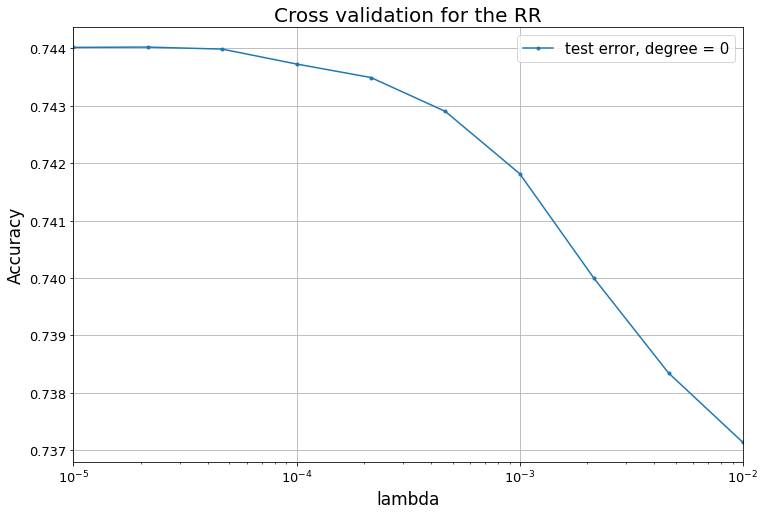

In [19]:
# parameters setting
type_ = 'RR'
bd_left = -5
bd_right = -2
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, seed=seed)

## Logistic Regression

In [25]:
max_iters = 1000
gamma = 0.2
initial_w = np.random.rand((x_train.shape[1]))
w, loss = logistic_regression(y_train, x_train, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels_for_log(w, x_test)
              
print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.69358


### Cross validation for logistic regression

100%|██████████| 10/10 [02:28<00:00, 14.85s/it]


Accuracy is 0.6916


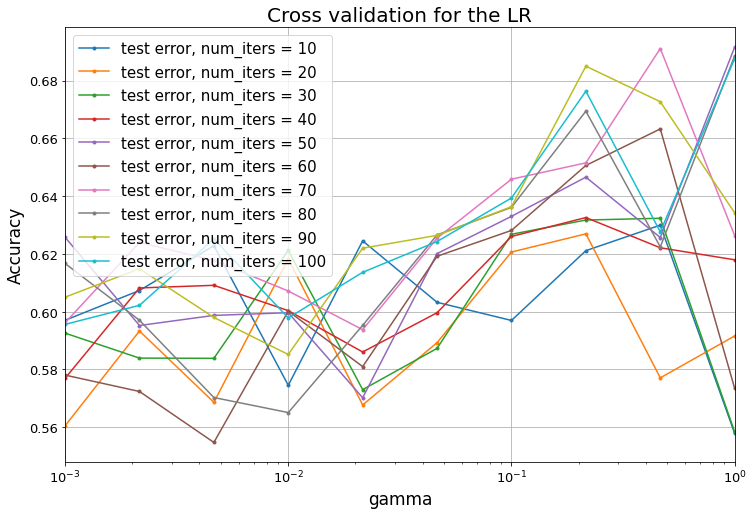

In [22]:
# parameters setting
type_ = 'LR'
bd_left = -3
bd_right = 0
# grid for hyperparameters
# gammas = np.linspace(10**bd_left, 10**bd_right, 10)
gammas = np.logspace(bd_left, bd_right, 10)
max_iters = np.arange(10, 110, 10)
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, gammas=gammas, max_iters=max_iters, seed=seed)

## Logistic Regression with Regularization

In [31]:
max_iters = 1000
gamma = 0.2
lambda_ = 1e-4
initial_w = np.random.rand((x_train.shape[1]))
w, loss = reg_logistic_regression(y_train, x_train, lambda_, initial_w, max_iters, gamma, plot_loss = False)
y_pred = predict_labels_for_log(w, x_test)
              
print("accuracy :", accuracy(y_pred, y_test))

accuracy : 0.69348


### Cross validation for logistic regression with regularizarion

100%|██████████| 1/1 [00:21<00:00, 21.20s/it]


Accuracy is 0.6855


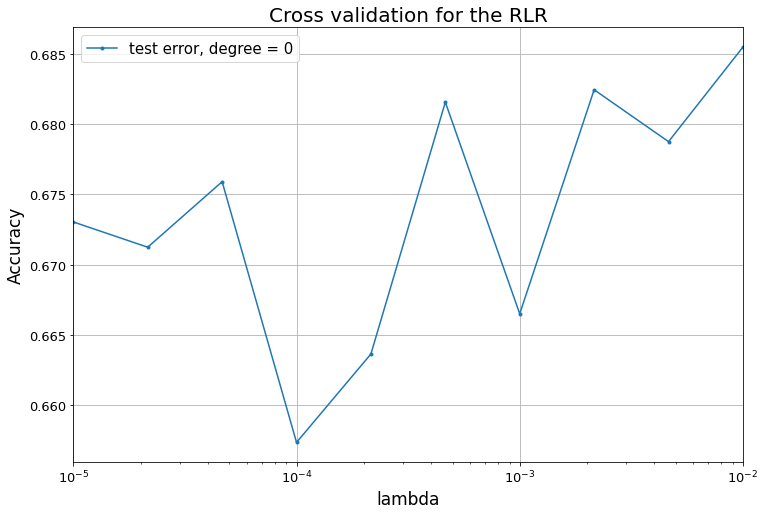

In [27]:
# parameters setting
type_ = 'RLR'
bd_left = -5
bd_right = -2
max_iters = 100
gammas = 0.2
# grid for hyperparameters
lambdas = np.logspace(bd_left, bd_right, 10)
degrees = np.arange(1)
cross_validation_demo_baseline(type_=type_, y=y_train, tx=x_train, bd_left=bd_left, bd_right=bd_right, lambdas=lambdas, degrees=degrees, max_iters=max_iters, gammas=gammas, seed=seed)